In [1]:
# Imports
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
import cv2
import os

In [14]:
image =cv2.imread('treino/lego01.jpg')
imageRGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
mask = cv2.inRange(imageRGB,np.array([50,120,200]),np.array([80,170,240]))
print(imageRGB.shape)
print(mask.shape)
mask = 255 - mask
mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
imageOut2 = cv2.multiply(imageRGB/255,mask/255)
cv2.imshow('Image',imageOut2)
cv2.waitKey(0)
cv2.destroyAllWindows()

(530, 706, 3)
(530, 706)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


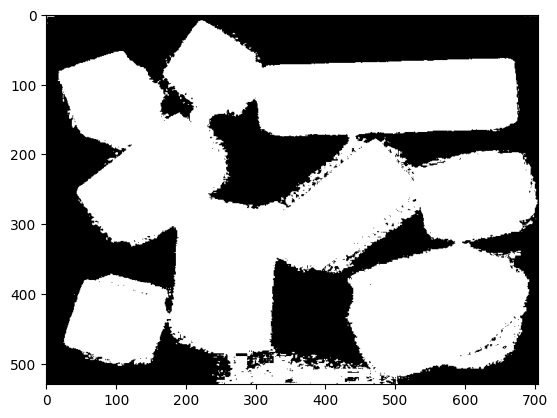

In [18]:
ret, thresh = cv2.threshold(imageOut2,0,255,cv2.THRESH_BINARY)
plt.imshow(thresh,'gray',vmin=0,vmax=255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


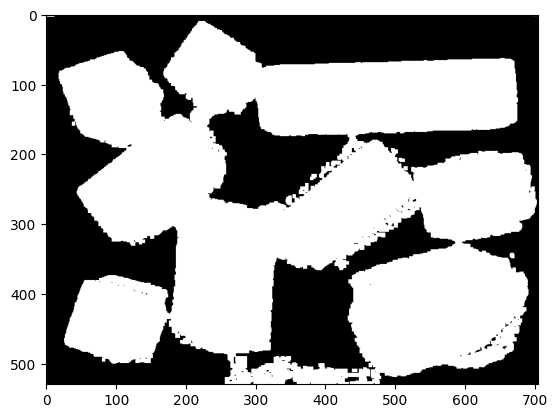

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
erosion = cv2.morphologyEx(thresh,cv2.MORPH_ERODE,kernel)
dilation = cv2.morphologyEx(erosion,cv2.MORPH_DILATE,kernel)
plt.imshow(dilation,'gray',vmin=0,vmax=255)

In [21]:
contours, hierarchy = cv2.findContours(dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours))) 
cv2.drawContours(brainImage, contours, -1, (0, 255, 0), 3) 
# cv2.imshow('Contours', brainImage) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()
regionNum, lb, stats, centroids = cv2.connectedComponentsWithStats(dilation)
graylevel , outImage = bwLabel.labeling(dilation)
print(regionNum)
print(graylevel)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours_new.cpp:330: error: (-2:Unspecified error) in function 'class std::shared_ptr<struct ContourScanner_> __cdecl ContourScanner_::create(class cv::Mat,int,int,class cv::Point_<int>)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 22 (CV_64FC3)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)
